Cascaded integrator–comb (CIC) 滤波器。由多个积分和梳状滤波器级联构成。在信号处理中,一般用在降采样或者插值过程中。  

积分器的形式为:  
   $$ Y_n = Y_{n-1}+X_n $$  
梳状滤波器形式为:  
   $$ Y_n = X_n + \alpha *X_{n-k} $$  


In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib ipympl
N_FFT=8192

Comb-Filter     $ Y_n = X_n +\alpha X_{n-k} $ 的频率响应类似于梳子  

频率响应为： $Y_z=(1+\alpha Z^{-k})X_z$




Text(0.5, 1.0, 'alpha=1,k=5')

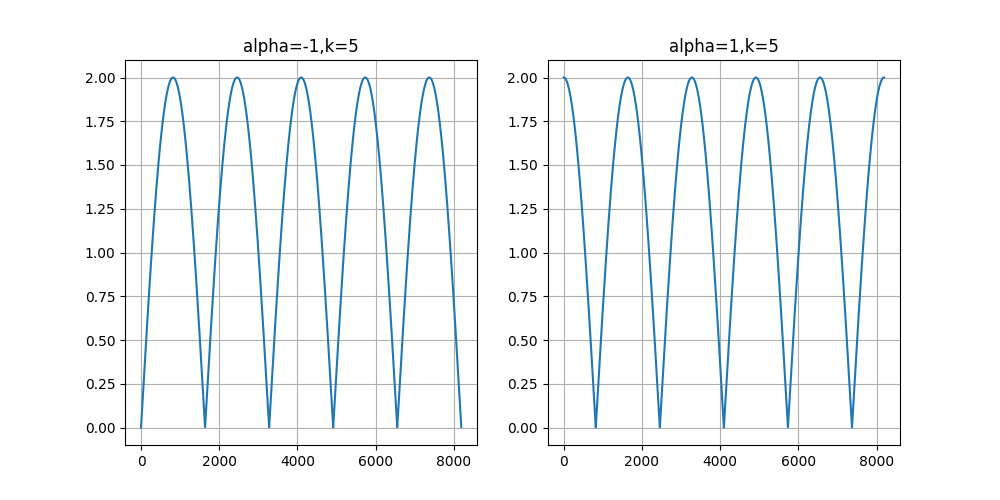

In [2]:
b=np.zeros(N_FFT)
b[0]=1
b[5]=-1
amp=np.fft.fft(b,N_FFT)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.abs(amp))
plt.grid()
plt.title('alpha=-1,k=5')
b[5]=1
amp=np.fft.fft(b,N_FFT)
plt.subplot(1,2,2)
plt.plot(np.abs(amp))
plt.grid()
plt.title('alpha=1,k=5')



一级的CIC,相当于移动平均系统。

时域看
$$ Y_n = X_n+X_{n-1}+...+ X_{n-k+1}   \\
       = \sum _{i=0}^n X_i - \sum _{i=0}^{n-k} X_i


$$

频域看

 $$  Y_z=\frac {(1-z^{-k}) } { 1-z^{-1}} \\
    = \sum _{i=0} ^ {k-1} z^{-i}
  $$



如果直接计算移动平均，则需要K个加法操作。 采用先积分再梳状的方法，则需要两个加法（一次积分，一次梳状）,和k个存储单元。用于K倍抽取,则只需要用一个存储单元。  

# 数值溢出
  积分器对所有数据进行累加，如果存在直流分量，就会溢出。不过，这并不影响结果正确性。 因为接下来的梳状滤波器会进行减法,数据就正确了。CIC的的运算都是模n的运算。n为大于k个数据的最小2的次方的数。

  





C:\Users\hj\AppData\Local\Temp/ipykernel_3332/179889711.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*np.log10(np.abs(amp)))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/179889711.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*np.log10(np.abs(amp)))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/179889711.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(20*np.log10(np.abs(amp)))


Text(0.5, 1.0, 'k=140')

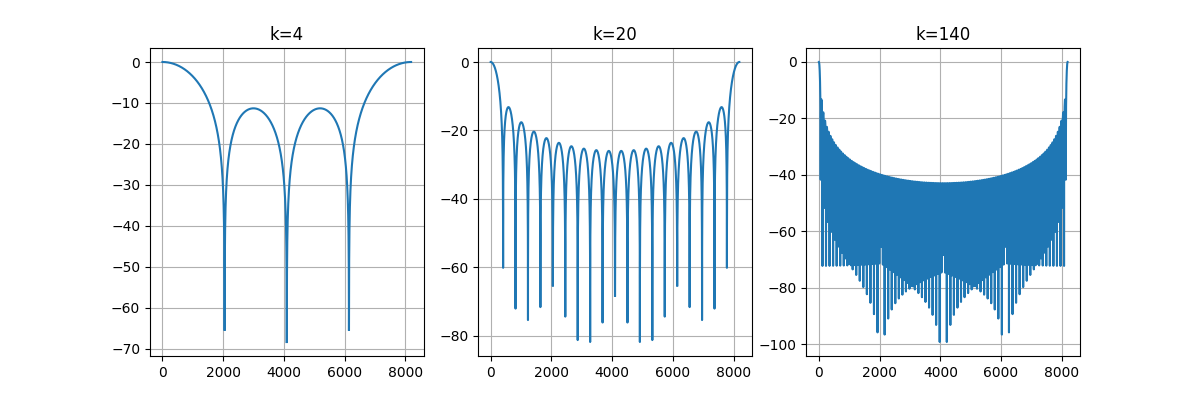

In [28]:


plt.figure(figsize=(12,4))
K=4
b=np.zeros(N_FFT)
b[0:K]=1/K
amp=np.fft.fft(b,N_FFT)

plt.subplot(1,3,1)
plt.plot(20*np.log10(np.abs(amp)))
plt.grid()
plt.title(f"k={K}")

K=20
b[0:K]=1/K
amp=np.fft.fft(b,N_FFT)
plt.subplot(1,3,2)
plt.plot(20*np.log10(np.abs(amp)))
plt.grid()
plt.title(f"k={K}")

K=140
b[0:K]=1/K
amp=np.fft.fft(b,N_FFT)
plt.subplot(1,3,3)
plt.plot(20*np.log10(np.abs(amp)))
plt.grid()
plt.title(f"k={K}")

CIC的频谱图发现，CIC的通带随K的增加而减少,不过第一旁瓣的增益固定不变。简单的增加K,滤波效果增加并不快。  


C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  ydb=20*np.log10(np.abs(amp))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  ydb=20*np.log10(np.abs(amp))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  ydb=20*np.log10(np.abs(amp))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  ydb=20*np.log10(np.abs(amp))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  ydb=20*np.log10(np.abs(amp))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  ydb=20*np.log10(np.abs(amp))
C:\Users\hj\AppData\Local\Temp/ipykernel_3332/4196981257.py:12: RuntimeWarning: divide by zero encountered in log10
  

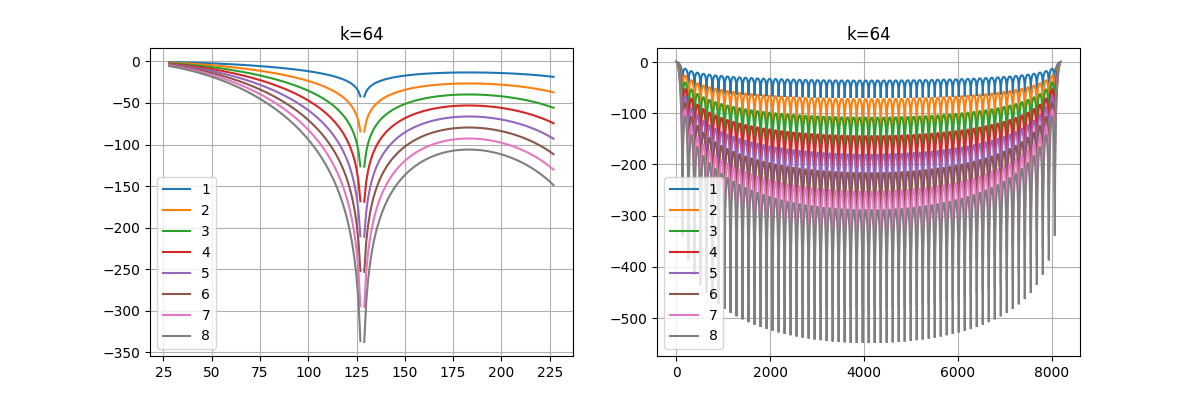

In [41]:
plt.figure(figsize=(12,4))
K=64
N_CASCADED=8
b=np.zeros(N_FFT)
b[0:K]=1/K
amp=np.fft.fft(b,N_FFT)
amp2=np.fft.fft(b,N_FFT)
x= np.linspace(N_FFT//K-100,N_FFT//K+100-1,200)
plt.subplot(1,2,1)
lgends = []
for i in range(N_CASCADED):
    ydb=20*np.log10(np.abs(amp))
    amp=amp*amp2
    plt.plot(x,ydb[N_FFT//K-100:N_FFT//K+100])
    lgends.append(str(i+1))
plt.grid()
plt.title(f"k={K}")
plt.legend(lgends)
plt.subplot(1,2,2)
amp2=np.fft.fft(b,N_FFT)
amp=np.fft.fft(b,N_FFT)
lgends = []
for i in range(N_CASCADED):
    ydb=20*np.log10(np.abs(amp))
    amp=amp*amp2
    plt.plot(ydb)
    lgends.append(str(i+1))
plt.grid()
plt.title(f"k={K}")
plt.legend(lgends)


不过级联多个CIC,增益比较大。